### Clustering using scikit-learn (with pandas and matplotlib)

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage  
%matplotlib inline

In [2]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
ruta = '/content/drive/My Drive/MDD/Clase5 - Laboratorio'
cities = pd.read_csv('%s/Cities.csv'%ruta)
cities.head()

,city,country,latitude,longitude,temperature
0,Aalborg,Denmark,57.03,9.92,7.52
1,Aberdeen,United Kingdom,57.17,-2.08,8.10
2,Abisko,Sweden,63.35,18.83,0.20
3,Adana,Turkey,36.99,35.32,18.67
4,Albacete,Spain,39.00,-1.87,12.62


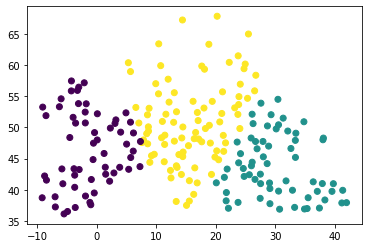

In [5]:
# K-means clustering basedo wn longitud-latitud
kmeans = cluster.KMeans(3)
kmeans.fit(cities[['longitude', 'latitude']])
labels = kmeans.labels_
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.show()
centroids = kmeans.cluster_centers_

In [7]:
centroids

array([[-1.25271186, 46.50169492],
       [30.17859375, 43.68109375],
       [15.74677778, 50.86988889]])

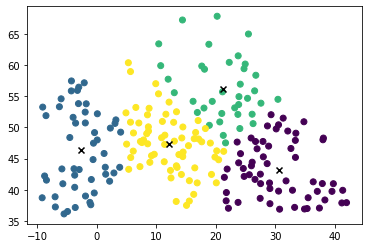

In [9]:
# Con los centroides
kmeans = cluster.KMeans(4)
kmeans.fit(cities[['longitude', 'latitude']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.show()

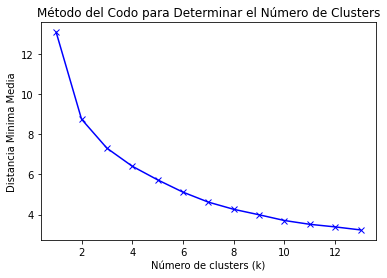

In [11]:
distortions = []
K = range(1,14)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(cities[['longitude', 'latitude']])
    distortions.append(sum(np.min(cdist(cities[['longitude', 'latitude']], kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / cities[['longitude', 'latitude']].shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distancia Minima Media')
plt.title('Método del Codo para Determinar el Número de Clusters')
plt.show()

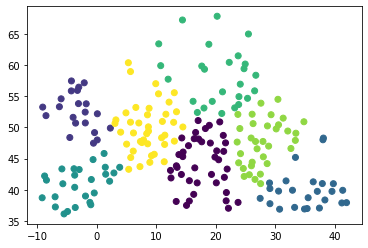

In [12]:
# K-means clustering basedo wn longitud-latitud
kmeans = cluster.KMeans(7)
kmeans.fit(cities[['longitude', 'latitude']])
labels = kmeans.labels_
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.show()
centroids = kmeans.cluster_centers_

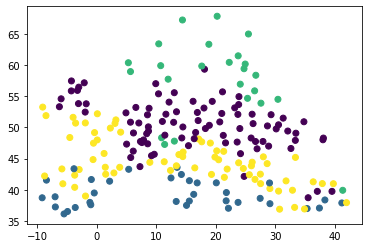

[[ 7.70390805]
 [15.55857143]
 [ 3.94541667]
 [10.65014925]]


In [13]:
# K-means clustering basado en temperatura
kmeans = cluster.KMeans(4)
kmeans.fit(cities[['temperature']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.show()
print(centroids)

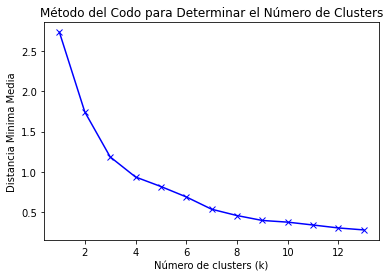

In [14]:
distortions = []
K = range(1,14)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(cities[['temperature']])
    distortions.append(sum(np.min(cdist(cities[['temperature']], kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / cities[['temperature']].shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distancia Minima Media')
plt.title('Método del Codo para Determinar el Número de Clusters')
plt.show()

In [15]:
df_city = cities.sample(10)
df_city

,city,country,latitude,longitude,temperature
139,Messina,Italy,38.20,15.55,16.54
209,Zaragoza,Spain,41.65,-0.89,14.17
10,Angers,France,47.48,-0.53,10.98
187,Sumy,Ukraine,50.92,34.78,6.28
144,Mulhouse,France,47.75,7.35,6.68
125,Linz,Austria,48.32,14.29,6.79
99,Heidelberg,Germany,49.42,8.70,8.47
117,Klaipeda,Lithuania,55.72,21.12,7.00
9,Andorra,Andorra,42.50,1.52,9.60
111,Kaunas,Lithuania,54.95,23.88,6.05


In [19]:
distancias = linkage(df_city[['temperature']].values, 'complete')
etiquetas = df_city.city.values

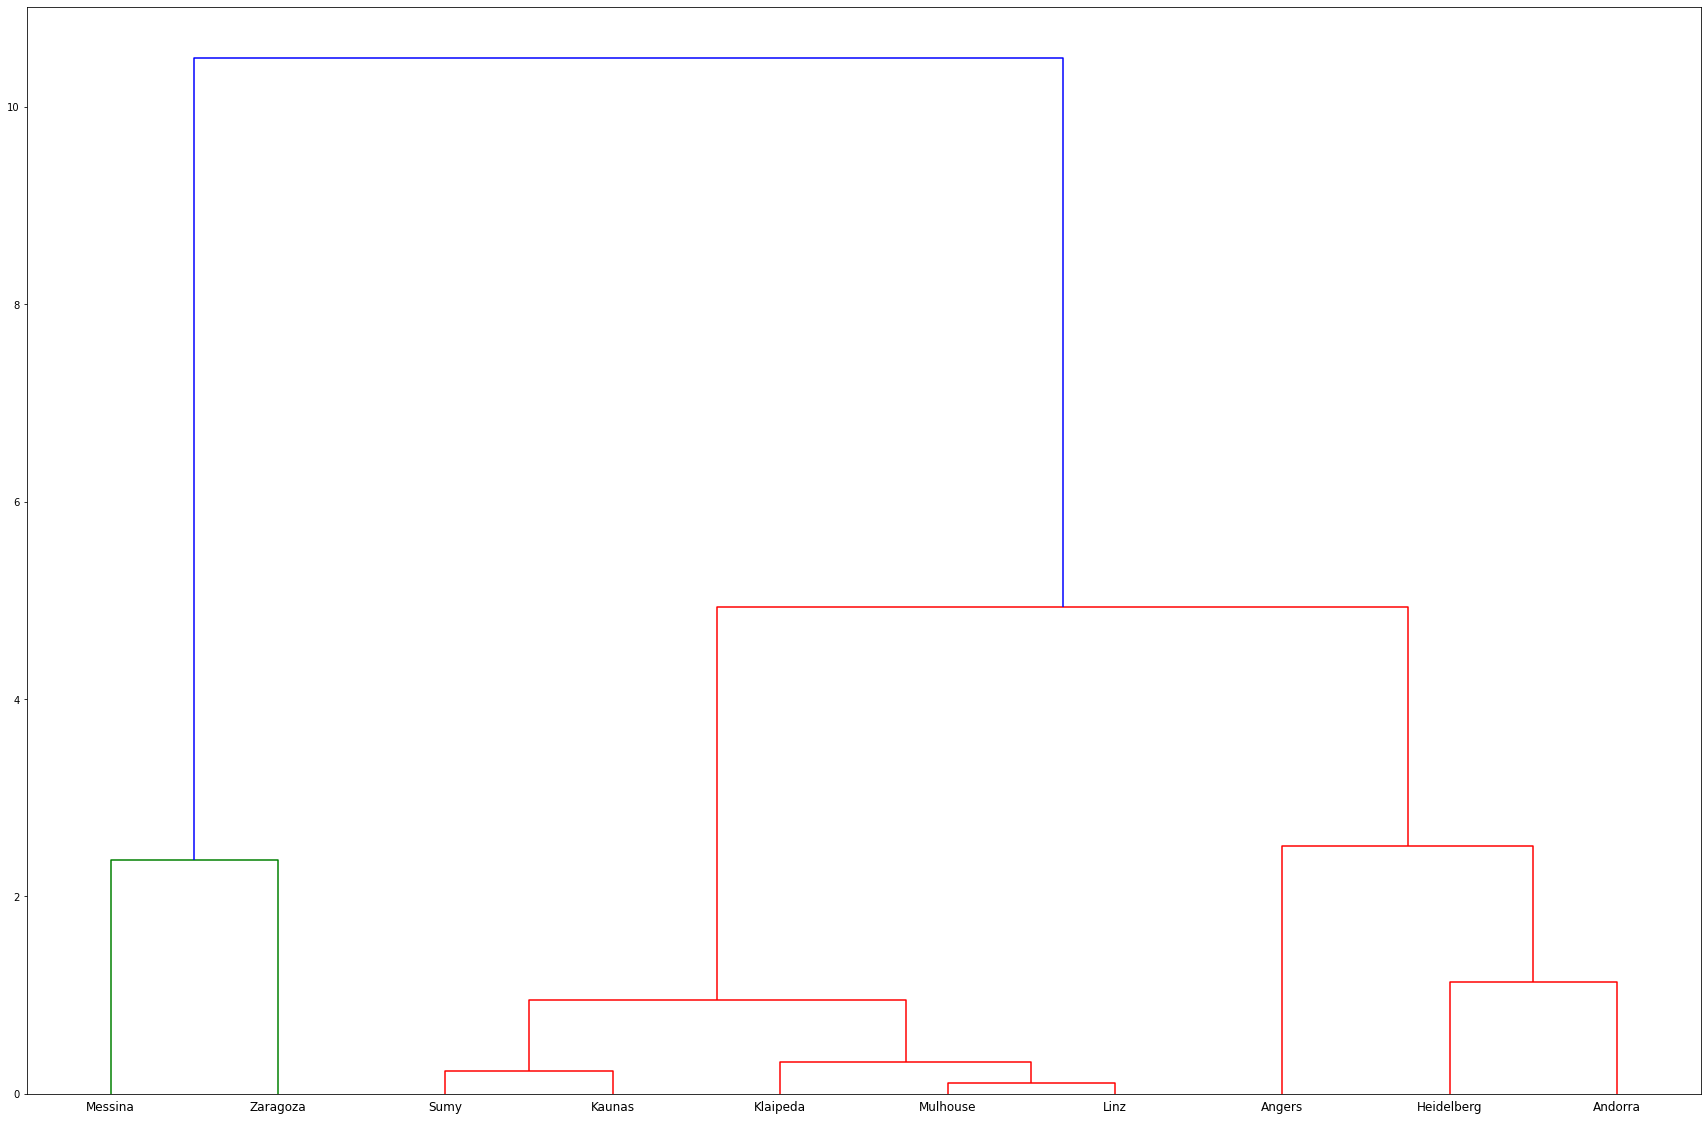

In [20]:
plt.figure(figsize=(30, 20))
dendrogram(distancias, orientation='top',labels = etiquetas, distance_sort='descending',show_leaf_counts=True)
plt.show()  